<a href="https://colab.research.google.com/gist/AlvaroRodriguezJimenez/bf5a978a553be9ed9a6e128b277262f6/rn_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 2: Redes Neuronales con Keras

## Dataset utilizado

Para este proyecto hemos seleccionado el dataset https://www.kaggle.com/tawsifurrahman/covid19-radiography-database el cuál incluye cuatro clases de radiografías del tórax humano clasificadas según si son casos positivos de COVID-19, si presentan opacidad pulmonar, si padece una neumonía viral o si no presenta ninguna anomalía.

## Pruebas hiperparámetros
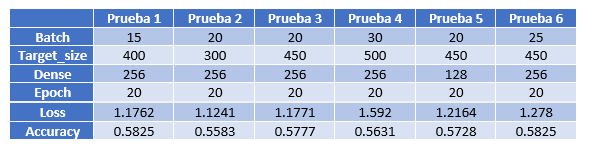

In [8]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.callbacks import EarlyStopping
import keras
from  time import time
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

## Red Neuronal

In [10]:
# DATA SOURCE -----------------------------------------------

batch_size = 25

train_data_dir = '/content/drive/MyDrive/dataset2/training'
validation_data_dir = '/content/drive/MyDrive/dataset2/validator'

train_datagen = ImageDataGenerator(
        rescale = 1./255,
        rotation_range = 15,
        zoom_range = 0.1
)

validation_datagen = ImageDataGenerator(
        rescale = 1./255
)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size = (450,450),
        batch_size = batch_size,
        class_mode = 'categorical'
)

validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size = (450,450),
        batch_size = batch_size,
        class_mode = 'categorical'
)

# MODEL -----------------------------------------------

model = Sequential()
model.add(Conv2D(32, 
                 kernel_size = (3,3), 
                 activation = 'relu', 
                 input_shape = (450, 450, 3))
)
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))

model.add(Dropout(0.5))
model.add(Dense(4, activation = 'softmax'))

model.compile(loss = keras.losses.categorical_crossentropy,
              optimizer = keras.optimizers.Adadelta(),
              metrics = ['accuracy'])

# TRAINING -----------------------------------------------

epochs = 20

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=4, restore_best_weights=True)

history = model.fit(train_generator,
          epochs = epochs,
          validation_data = validation_generator,
          callbacks = [es]
)

# SAVING -----------------------------------------------

model.save("rn_keras")

Found 1200 images belonging to 4 classes.
Found 206 images belonging to 4 classes.
Epoch 1/20
48/48 [==============================] - 49s 1s/step - loss: 1.3546 - accuracy: 0.3261 - val_loss: 1.3097 - val_accuracy: 0.2184
Epoch 2/20
48/48 [==============================] - 48s 987ms/step - loss: 1.1801 - accuracy: 0.4597 - val_loss: 1.2074 - val_accuracy: 0.5583
Epoch 3/20
48/48 [==============================] - 48s 995ms/step - loss: 1.1038 - accuracy: 0.5052 - val_loss: 1.2334 - val_accuracy: 0.2961
Epoch 4/20
48/48 [==============================] - 48s 989ms/step - loss: 1.0389 - accuracy: 0.5305 - val_loss: 1.1948 - val_accuracy: 0.5825
Epoch 5/20
48/48 [==============================] - 48s 993ms/step - loss: 1.0346 - accuracy: 0.5459 - val_loss: 1.2011 - val_accuracy: 0.4515
Epoch 6/20
48/48 [==============================] - 47s 987ms/step - loss: 0.9852 - accuracy: 0.5927 - val_loss: 1.2346 - val_accuracy: 0.3786
Epoch 7/20
48/48 [==============================] - 48s 988ms/

## Visualización gráfica de los resultados

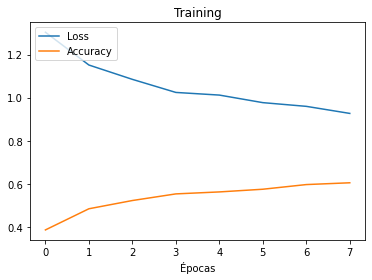

In [11]:
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['accuracy'], label='Accuracy')

plt.title('Training')
plt.xlabel('Épocas')
plt.legend(loc="upper left")

plt.show()


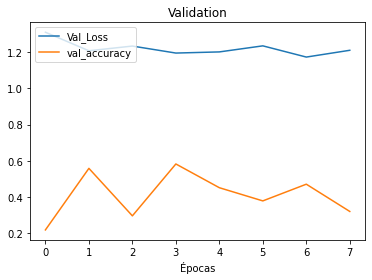

In [12]:
plt.plot(history.history['val_loss'], label='Val_Loss')
plt.plot(history.history['val_accuracy'], label='val_accuracy')

plt.title('Validation')
plt.xlabel('Épocas')
plt.legend(loc="upper left")

plt.show()

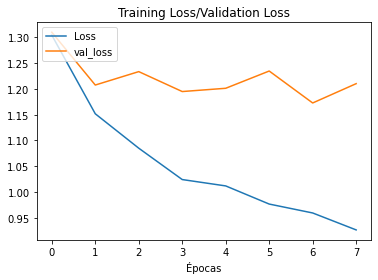

In [13]:
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_loss')

plt.title('Training Loss/Validation Loss')
plt.xlabel('Épocas')
plt.legend(loc="upper left")

plt.show()

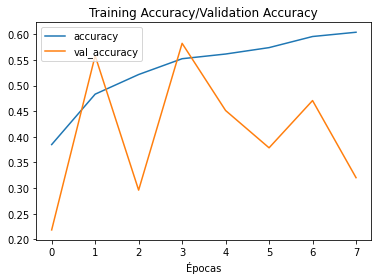

In [14]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')

plt.title('Training Accuracy/Validation Accuracy')
plt.xlabel('Épocas')
plt.legend(loc="upper left")

plt.show()

## Conclusiones
En términos generales podríamos decir que a medida que nuestra red cunple épocas, tanto el loss como el accuracy van mejorando su valor.

Si nos adentramos un poco mas en los datos y enfocamos nuestro análisis en los resultados de validación, podemos observar que no presentan una mejora de su valor de la misma magnitud que los resultados del entrenamiento. De este hecho podemos determinar que nuestra red neuronal no es capáz de generalizar los datos y características obtenidas en el entrenamiento.
